## Análise sobre o efeito da corrupção na felicidade ##
Objetivos: 
1. Identificar o efeito da corrupção na felicidade das pessoas em diferentes países
2. Apontar quais variiveis mais influenciam na felicidade das pessoas
3. Determinar quais aspectos podem ser melhorados para aumentar o nível de felicidade das pessoas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [4]:
df = pd.read_csv('hap_corrup.csv')
display(df.head())

,Country,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,continent,Year,social_support,cpi_score
0,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Europe,2015,0.0,88
1,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Europe,2015,0.0,91
2,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Europe,2015,0.0,79
3,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Europe,2015,0.0,86
4,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Europe,2015,0.0,90


In [5]:
#Estatística descritiva dos dados
df.describe()

,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,Year,social_support,cpi_score
count,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000
mean,5.473310,0.929217,0.504998,0.648691,0.427016,0.212440,0.125720,1.379277,2017.500000,0.609302,44.327020
std,1.124726,0.385774,0.552736,0.232261,0.148003,0.121660,0.109032,1.075276,1.708904,0.640754,19.508833
min,2.566900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,0.000000,11.000000
25%,4.590750,0.644242,0.000000,0.510070,0.325433,0.125784,0.052862,0.000000,2016.000000,0.000000,30.000000
50%,5.485500,0.994544,0.000000,0.685397,0.439621,0.197000,0.089000,1.731948,2017.500000,0.176214,38.000000
75%,6.300500,1.228677,1.040410,0.815641,0.546280,0.273250,0.154250,2.236894,2019.000000,1.268250,57.000000
max,7.808700,2.096000,1.610574,1.141000,0.724000,0.838075,0.551910,3.602140,2020.000000,1.644000,91.000000


In [7]:
# Identificando se há dados faltantes

df.isna().sum()
#Não há dados faltantes

Country              0
happiness_score      0
gdp_per_capita       0
family               0
health               0
freedom              0
generosity           0
government_trust     0
dystopia_residual    0
continent            0
Year                 0
social_support       0
cpi_score            0
dtype: int64

In [20]:
#Variáveis que não serão utilizadas devido ao alto número de zeros
##Pesquisar como fazer
mascara = df['family'] == 0
display(df[mascara].sum())


#family
#dystopia_residual
#social_support


Country              FinlandDenmarkNorwayIcelandNetherlandsSwitzerl...
happiness_score                                            2185.451399
gdp_per_capita                                              361.678917
family                                                             0.0
health                                                      276.434999
freedom                                                      176.87234
generosity                                                   73.168746
government_trust                                             47.418847
dystopia_residual                                           263.084564
continent            EuropeEuropeEuropeEuropeEuropeEuropeEuropeAust...
Year                                                            801279
social_support                                              482.567282
cpi_score                                                        17572
dtype: object

In [9]:
df.shape

(792, 13)

In [10]:
df.drop_duplicates()

,Country,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,continent,Year,social_support,cpi_score
0,Norway,7.5370,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Europe,2015,0.000000,88
1,Denmark,7.5220,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Europe,2015,0.000000,91
2,Iceland,7.5040,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Europe,2015,0.000000,79
3,Switzerland,7.4940,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Europe,2015,0.000000,86
4,Finland,7.4690,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Europe,2015,0.000000,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,Botswana,3.4789,0.997549,0.000000,0.494102,0.509089,0.033407,0.101786,0.257241,Africa,2020,1.085695,60
788,Tanzania,3.4762,0.457163,0.000000,0.442678,0.509343,0.271541,0.203881,0.718963,Africa,2020,0.872675,38
789,Rwanda,3.3123,0.343243,0.000000,0.572383,0.604088,0.235705,0.485542,0.548445,Africa,2020,0.522876,54
790,Zimbabwe,3.2992,0.425564,0.000000,0.375038,0.377405,0.151349,0.080929,0.841031,Africa,2020,1.047835,24


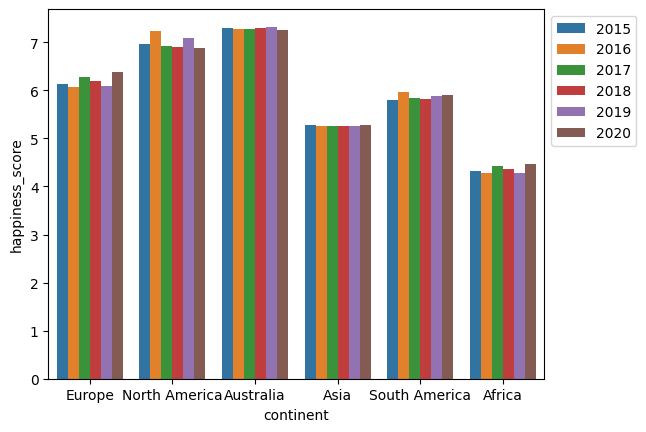

In [12]:
sns.barplot(data = df, x = 'continent', y = 'happiness_score', hue = 'Year', errorbar=None)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

In [21]:
sns.pairplot(df, hue = 'Year')
#Quanto maior a renda per capita maior a felicidade das pessoas

#Saúde contribui positivamente

#liberdade - positiva mas está bem dispersa - Ver por continente e país

#generosidade - Não aparenta ter muita relação com a felicidade

#confiança no governo - curva - relacionar com liberdade tb
#quanto mais feliz mais confiança esperamos que as pessoas tenham no governo

#cpi_percepção de corrupção - países mais transparentes tem maior indice de felicidade

In [ ]:
#Efeito da corrupção

#Confiança no governo e felicidade

#CPi e felicidade